# Building a Machine Learning App in R

## BSGP 7030 Summer 2024

### Loading the necessary libraries

In [1]:
library(caret)
library(kernlab)
library(ggplot2)
library(lattice)
library(randomForest)
library(ellipse)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




### Loading the Iris Dataset and renaming the Dataset

In [2]:
data(iris)

dataset <- iris

### Alternative Way of loading the Iris dataset: Listed as comments as not cause issue in the code

In [3]:
# creating a variable for the iris.csv file 
    # filename <- "iris.csv"
# loading the iris.csv from a local directory
    #dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
 #colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

### 2.3 Creating a validation dataset

#### Creating a list of 80% of the rows in the original dataset as a training dataset

In [4]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

#### Selecting 20% of the data for validation

In [5]:
validation <- dataset[-validation_index,]

#### Using the remaning 80% of data to train and test the models

In [6]:
dataset <- dataset[validation_index,]

### 3. Summarizing the Dataset

### 3.1 Dimensions of the Dataset

In [7]:
dim(dataset)

[1] 120   5

### 3.2 Listing the types of Attributes in the Dataset

In [8]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### 3.3 Taking a peek at the first 5 rows of the Dataset

In [9]:
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


### 3.4 looking at the levels of the Class for the species column

In [10]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

### 3.5 Looking at the Class Distribution of the species column

In [12]:
percentage <- prop.table(table(dataset$Species)) * 100

cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### 3.6 Statistical Summary of the Dataset

In [13]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.824   Mean   :3.042   Mean   :3.742   Mean   :1.203  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.200   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

### 4.0 Visualizing the Dataset

### 4.1 Univariate Plots

#### Spliting the inputs attributes x and the output attributes of the Dataset

In [14]:
x <- dataset[,1:4]
y <- dataset[,5]

#### Creating a box plot for each attribute on one image

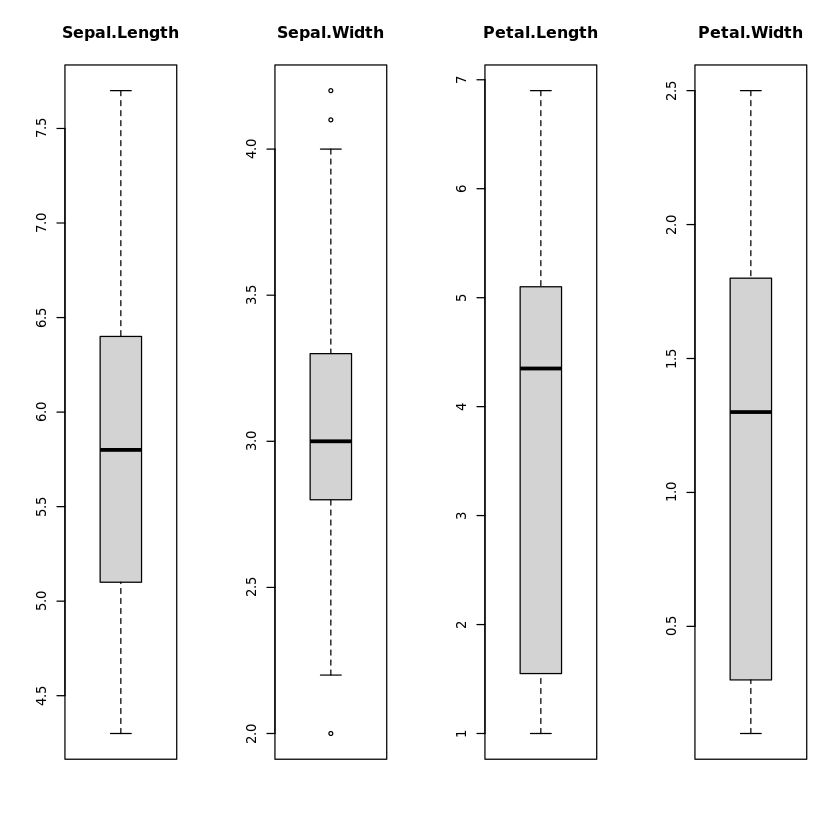

In [15]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

#### Creating a barplot of the Species class variable 

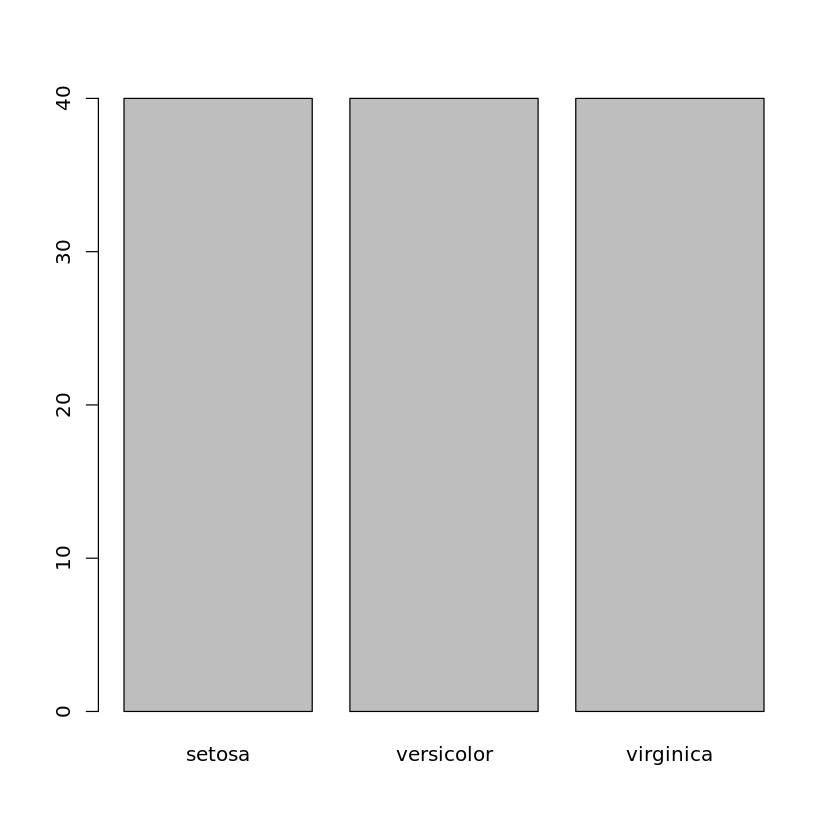

In [16]:
plot(y)

### 4.2 Multivariate Plots

#### Creating scatterplots of all pairs of attributes and color the points by class.

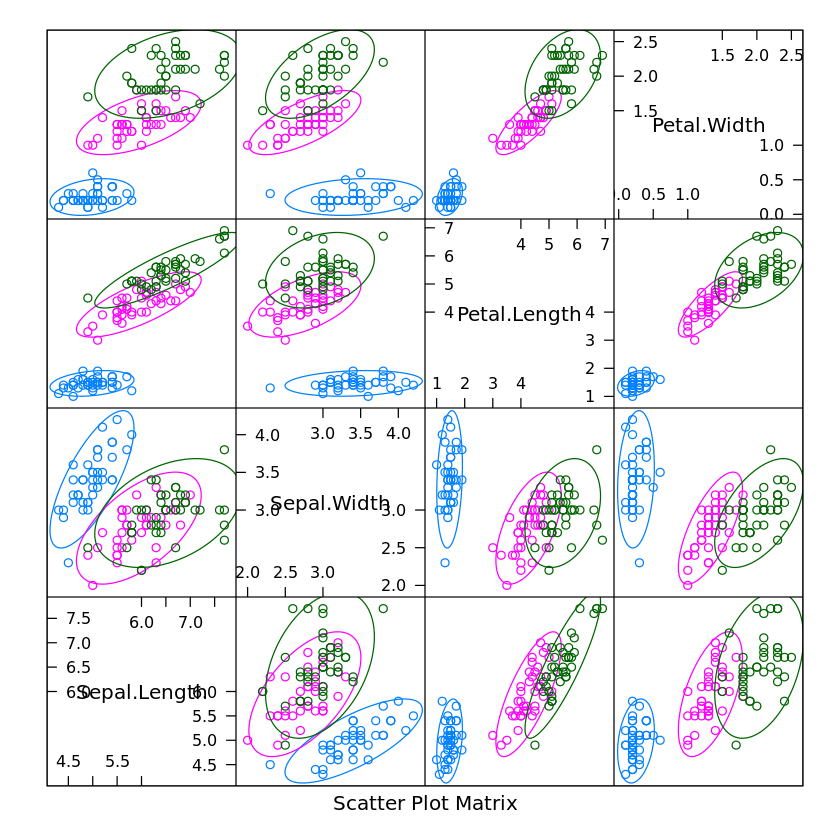

In [17]:
featurePlot(x=x, y=y, plot="ellipse")

#### Creating a box and whisker plots of each input variable again, but this time broken down into separate plots for each class

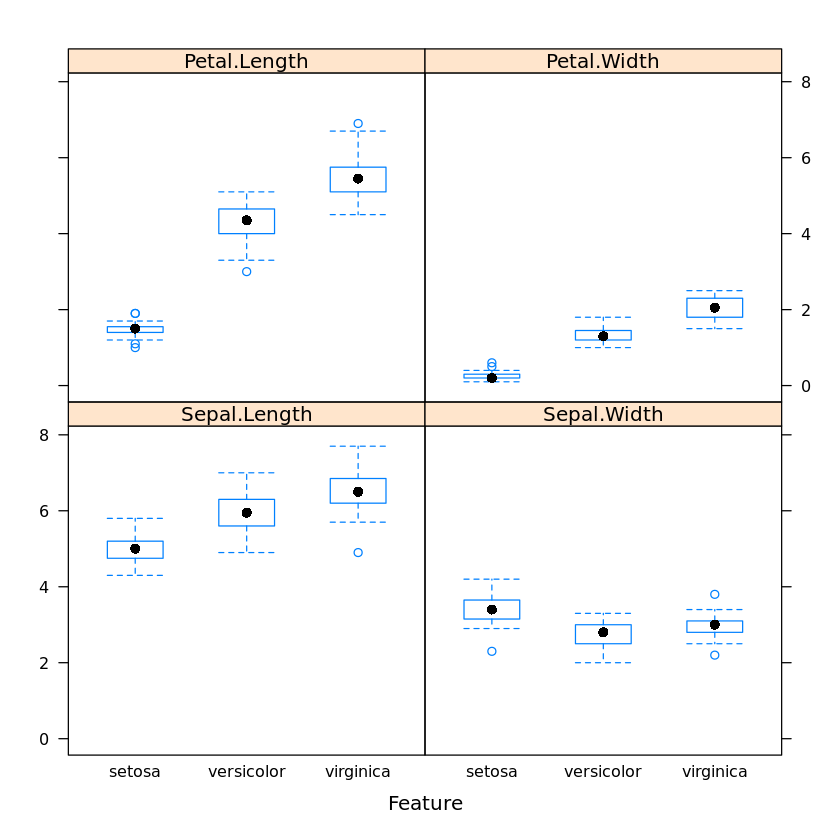

In [18]:
featurePlot(x=x, y=y, plot="box")

#### Creating density plots for each attribute by class value

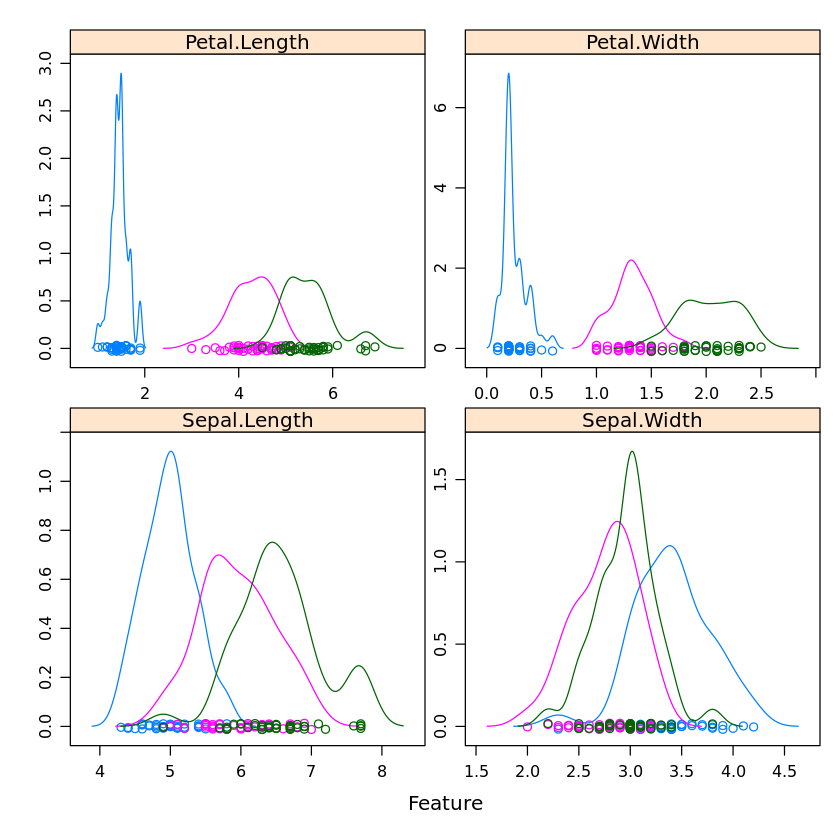

In [19]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### 5. Evaluating Some of Algorithms for modeling the data

### 5.1 Creating a Test Harness

#### Running algorithms using 10-fold cross validation

In [21]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### 5.2 Buliding Models

### Evaluating 5 different algorithms:

1. Linear Discriminant Analysis (LDA)
2. Classification and Regression Trees (CART).
3. k-Nearest Neighbors (kNN).
4. Support Vector Machines (SVM) with a linear kernel.
5. Random Forest (RF)

#### Creating the linear algorithms

In [22]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

#### Creating the nonlinear algorithms

>CART

In [23]:
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

>kNN

In [24]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

#### Creating advanced algorithms

>SVM

In [25]:
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

>RVM

In [26]:
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

### 5.3 Selecting the best model

#### Comparing the models

In [27]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 0.9166667 1.0000000 0.9583333       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
svm  0.8333333 0.8541667 0.9583333 0.9333333       1    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 0.87500 1.0000 0.9375       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.875 0.87500 1.0000 0.9500       1    1    0
svm  0.750 0.78125 0.9375 0.9000       1    1    0
rf   0.750 0.87500 0.9375 0.9250       1    1    0


#### Creating a plot of the model evaluation results and comparing the spread and the mean accuracy of each model

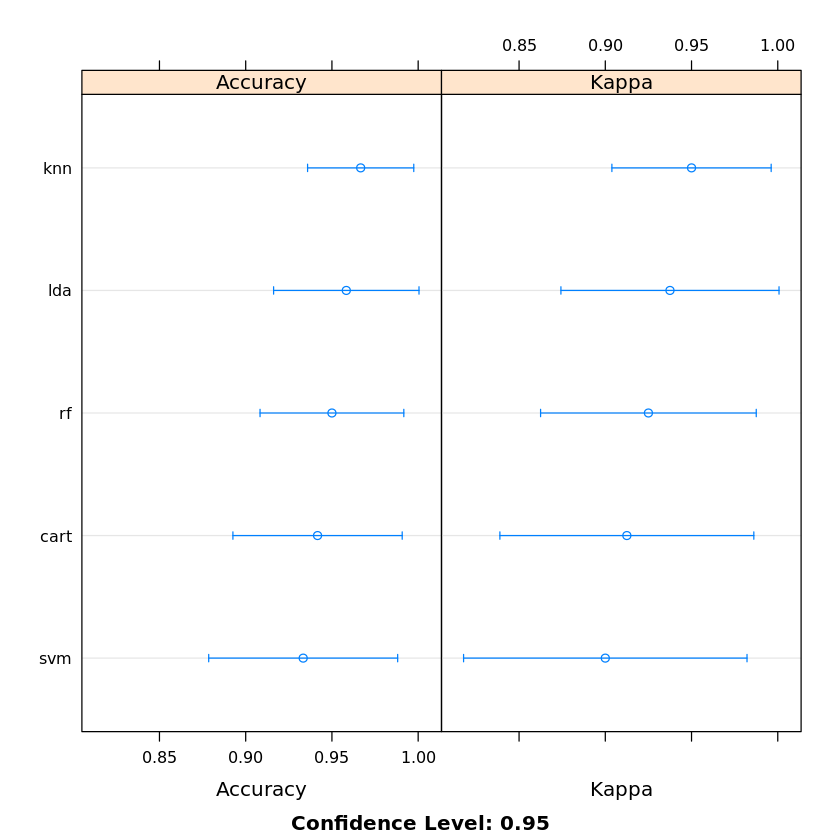

In [28]:
dotplot(results)

#### Summarizing the Best Model LDA

In [29]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa 
  0.9583333  0.9375



### 6.0 Making predictions with the LDA model

#### Running the LDA model directly on the validation set and summarize the results in a confusion matrix

In [30]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            